In [1]:
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
from scipy.optimize import fmin_tnc, check_grad

In [2]:
data = pd.read_csv("./ex2/ex2data1.txt", header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = data.iloc[:,:2]
y = data.iloc[:,-1][:,np.newaxis]
range(y.shape[0])

range(0, 100)

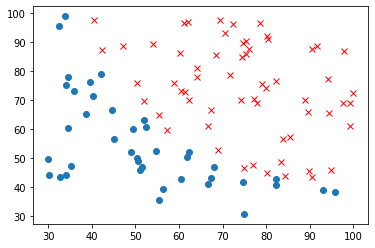

In [4]:
pl.plot(X.loc[(y==1).flatten(), 0], X.loc[(y==1).flatten(),1], 'rx')
pl.plot(X.loc[(y==0).flatten(), 0], X.loc[(y==0).flatten(),1], 'o')

In [5]:
X = pd.concat([pd.DataFrame(np.ones((y.shape[0],1))), X],axis=1,ignore_index=True)
X.head()

,0,1,2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [6]:
initial_theta = pd.DataFrame(np.zeros(3))
# initial_theta = initial_theta*0.001
initial_theta.head()

,0
0,0.0
1,0.0
2,0.0


In [7]:
def sigmoid(X, theta):
    bottom_part = (1+ np.exp(-1*(X.dot(theta))))
    m = X.shape[0]
    return 1/bottom_part if bottom_part[0][0] > 0 else pd.DataFrame(np.zeros(m))

In [8]:
def costFunction(theta, X, y):
    m = y.shape[0]
    r_s = sigmoid(X,theta)
    J = (1/m)*(-y.T.dot(np.log(r_s))-((1-y).T.dot(np.log(1-r_s))))

    return J

In [9]:
def gradientDescent(theta, X, y):
    m = y.shape[0]
    r_s = sigmoid(X,theta)
    return (1/m)*(X.T.dot(r_s-y.reshape(m,1)))

In [13]:
check_grad(costFunction, gradientDescent, initial_theta, X, y)

ValueError: `x0` must have at most 1 dimension.

In [12]:
print(X.shape, y.shape, initial_theta.shape)

(100, 3) (100, 1) (3, 1)


In [37]:
J = costFunction(initial_theta,X,y.flatten())
J

array([0.69314718])

In [35]:
grad = gradientDescent(initial_theta,X,y.flatten())
grad

,0
0,-0.100000
1,-12.009217
2,-11.262842


In [16]:
y.shape

(100, 1)

In [11]:
new_theta = fmin_tnc(func=costFunction, x0=np.zeros(3), args=(X,y.flatten()), fprime=gradientDescent)

IndexError: invalid index to scalar variable.